<a href="https://colab.research.google.com/github/azibfarooq/Spark-Foundation-Internship/blob/main/Elbow_Method_to_find_value_of_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Elbow Method to find Ideal value of K for K_Mean clustering
## Azib Farooq
K_mean clustering is categorizing algorithm which can be used to categorize data into clusters based upon relative distance between the points and the cluster. The biggest problem in this method is to find out the number of clusters.
So,
Elbow method is a very good approach to figure out the most suitable number of useful clusters after which increasing the number of clusters in the model will have no significant impact over the results. On the contrary, it will cost resources for the processing and relative tasks.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

print('Libraries Imported')

Libraries Imported


In [25]:
#we are using sample dataset related to iris provided by sklearn
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


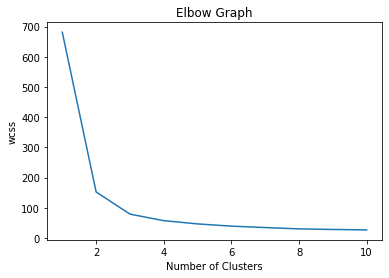

In [ ]:
X = iris_df.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
wcss = [] #within cluster sum of squares vector
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init='k-means++',
                  max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.title('Elbow Graph')
plt.show()

From the above graph it is apparent that after 3 clusters (on x-axis) the line has almost same sum of squares. So, three will be the ideal in our case to select for the value of K.

In [34]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

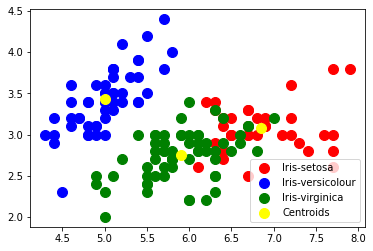

In [ ]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1],
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1],
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()